In [59]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

In [60]:
# Load the data into a pandas dataframe
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


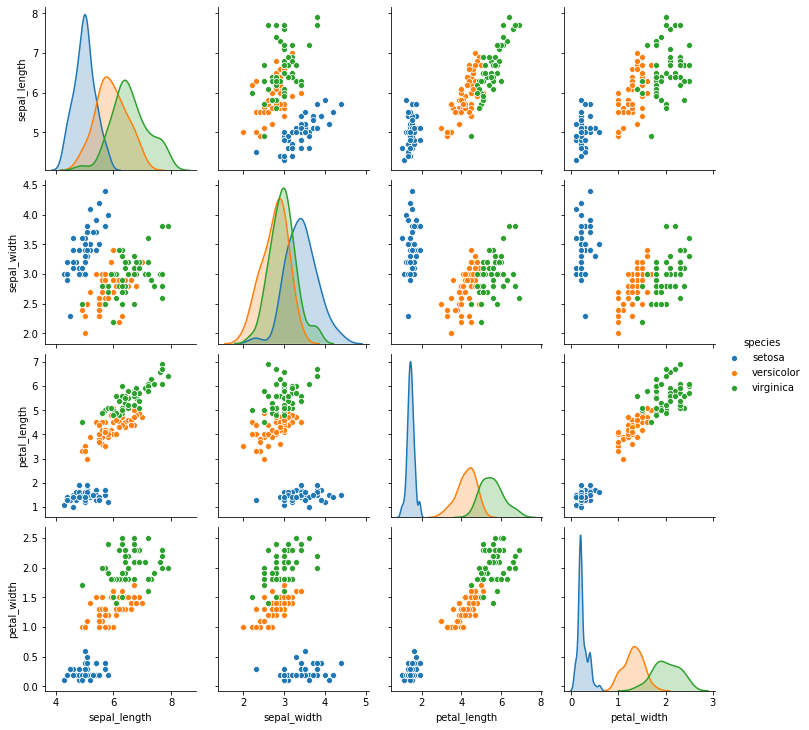

In [61]:
sns.pairplot(iris, hue='species')
plt.show()

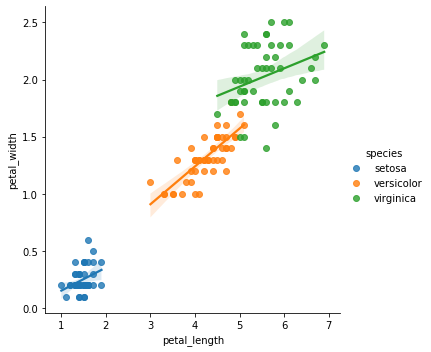

In [62]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue='species')
plt.show()

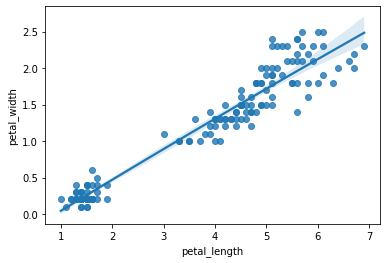

In [63]:
sns.regplot(x="petal_length", y="petal_width", data=iris, order=2)
plt.show()

In [64]:
X = iris[["petal_length"]]
y = iris["petal_width"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print(f'c = {results.intercept_}, m = {results.coef_}')

c = -0.3630755213190291, m = [0.41575542]


In [65]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            petal_width   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4417.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                   1.22e-112
Time:                        19:07:10   Log-Likelihood:                         -8.7179
No. Observations:                 150   AIC:                                      19.44
Df Residuals:                     149   BIC:                                      22.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [66]:
dummies = pd.get_dummies(iris["species"])
# Add to the original dataframe
iris = pd.concat([iris, dummies], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [67]:
iris.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [68]:
X = iris[["petal_length", "setosa", "versicolor", "virginica"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y = iris["petal_width"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     845.5
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           4.88e-92
Time:                        19:07:10   Log-Likelihood:                 46.704
No. Observations:                 150   AIC:                            -85.41
Df Residuals:                     146   BIC:                            -73.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2501      0.098      2.561   

In [69]:
X = iris[["petal_length"]]
X = sm.add_constant(X)
y = iris["sepal_length"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.04e-47
Time:                        19:07:10   Log-Likelihood:                -77.020
No. Observations:                 150   AIC:                             158.0
Df Residuals:                     148   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3066      0.078     54.939   

In [70]:
X = iris[["petal_length", "setosa", "versicolor", "virginica"]]
y = iris["sepal_length"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     249.4
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           3.10e-57
Time:                        19:07:10   Log-Likelihood:                -48.116
No. Observations:                 150   AIC:                             104.2
Df Residuals:                     146   BIC:                             116.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
petal_length     0.9046      0.065     13.962   

In [71]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.079396,0.638020
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348,-0.467703,-0.135645
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765,0.201754,0.721011
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344,0.117899,0.769445
setosa,-0.717416,0.603348,-0.922765,-0.887344,1.000000,-0.500000,-0.500000
versicolor,0.079396,-0.467703,0.201754,0.117899,-0.500000,1.000000,-0.500000
virginica,0.638020,-0.135645,0.721011,0.769445,-0.500000,-0.500000,1.000000


In [72]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1


In [73]:
X = iris[["petal_length", "setosa", "versicolor", "virginica"]]
y = iris["petal_width"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

preds = model.predict(iris[["petal_length", "setosa", "versicolor", "virginica"]])
X = sm.add_constant(X) # another way to add a constant row for an intercept

X = iris[["petal_length"]]
y = iris["petal_width"]

comp = iris
comp['Predictions'] = preds
comp['Actual'] = iris["petal_width"]
comp.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica,Predictions,Actual
0,5.1,3.5,1.4,0.2,setosa,1,0,0,0.231716,0.2
1,4.9,3.0,1.4,0.2,setosa,1,0,0,0.231716,0.2
2,4.7,3.2,1.3,0.2,setosa,1,0,0,0.208677,0.2
3,4.6,3.1,1.5,0.2,setosa,1,0,0,0.254755,0.2
4,5.0,3.6,1.4,0.2,setosa,1,0,0,0.231716,0.2
5,5.4,3.9,1.7,0.4,setosa,1,0,0,0.300833,0.4
6,4.6,3.4,1.4,0.3,setosa,1,0,0,0.231716,0.3
7,5.0,3.4,1.5,0.2,setosa,1,0,0,0.254755,0.2
8,4.4,2.9,1.4,0.2,setosa,1,0,0,0.231716,0.2
9,4.9,3.1,1.5,0.1,setosa,1,0,0,0.254755,0.1


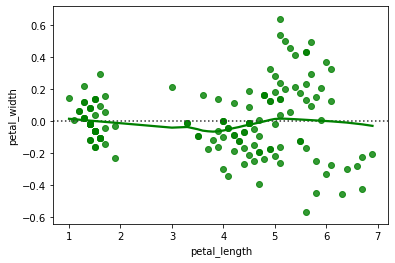

In [74]:
sns.residplot(iris['petal_length'], iris['petal_width'], lowess=True, color="g")

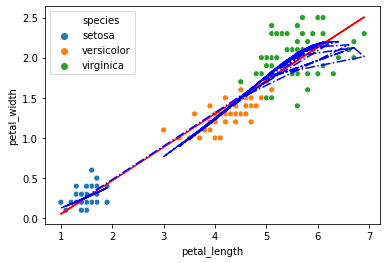

In [82]:
#iris = iris.sort_values('petal_length')

sns.scatterplot(x=iris['petal_length'], y=iris['petal_width'],hue=iris['species'])
z1 = np.polyfit(iris['petal_length'], iris['petal_width'], 1)
f1 = np.poly1d(z1)
z2 = np.polyfit(iris['petal_length'], iris['petal_width'], 5)
f2 = np.poly1d(z2)
plt.plot(iris['petal_length'], f1(iris['petal_length']), 'r')
plt.plot(iris['petal_length'], f2(iris['petal_length']),'b-.')